In [ ]:
# FINAL YEAR PROJECT - CODE

In [ ]:
"""Importning necessary imports for code to run"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LogisticRegression  
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from catboost import CatBoostClassifier  
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier 

pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv(r"default_of_credit_card_clients.csv")
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,female,university,married,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,female,university,single,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,female,university,single,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,female,university,married,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,male,university,married,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,male,high school,married,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,male,high school,single,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,male,university,single,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,male,high school,married,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [3]:
data = data.drop(columns=['ID'])

In [ ]:
"""Checking for any missing values"""

data.isnull().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

In [5]:
data.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

In [6]:
data['SEX'].value_counts()

SEX
female    18112
male      11888
Name: count, dtype: int64

In [7]:
data['EDUCATION'].value_counts()

EDUCATION
university         14030
graduate school    10585
high school         4917
others               454
not educated          14
Name: count, dtype: int64

In [8]:
data['MARRIAGE'].value_counts()

MARRIAGE
single     15964
married    13659
others       377
Name: count, dtype: int64

In [9]:
pay_columns = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
def determine_delay_status(row):
    if any(row[col] > 0 for col in pay_columns):
        return 1
    else: 
        return 0

data['Delay_Status'] = data.apply(determine_delay_status, axis=1)

In [10]:
data['Delay_Count'] = (data[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']] > 0).sum(axis=1)

In [11]:
data['Max_Delay'] = data[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].max(axis=1)

In [12]:
def categorize_delays(row):
    delay_count = (row > 0).sum()
    max_delay = row.max()
    if delay_count == 0:
        return 0
    elif max_delay <= 3:
        return 1
    elif max_delay > 3:
        return 2

data['Delay_Category'] = data[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].apply(categorize_delays, axis=1)

In [13]:
data['Delay_Days'] = data['Delay_Count'] * 30

In [14]:
def has_sequantial_delays(row):
    count = 0
    for i in row:
        if i > 0:
            count += 1
            if count >= 2:
                return 1
        else:
            count = 0
    return 0

data['Sequantial_Delay_Status'] = data[pay_columns].apply(has_sequantial_delays, axis=1)

In [15]:
data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,Delay_Status,Delay_Count,Max_Delay,Delay_Category,Delay_Days,Sequantial_Delay_Status
0,20000,female,university,married,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,1,2,2,1,60,1
1,120000,female,university,single,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,1,2,2,1,60,0
2,90000,female,university,single,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0,0,0,0,0,0
3,50000,female,university,married,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0,0,0,0,0,0
4,50000,male,university,married,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,male,high school,married,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0,0,0,0,0,0,0
29996,150000,male,high school,single,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0,0,0,0,0,0,0
29997,30000,male,university,single,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1,1,3,4,2,90,1
29998,80000,male,high school,married,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1,1,1,1,1,30,0


In [16]:
def has_early_payment(row):
    if any(row[col] < 0 for col in pay_columns): 
        return 1 
    else:
        return 0
    
data['Has_Early_Payment'] = data.apply(has_early_payment, axis=1)

In [17]:
data['Debt_1'] = data['BILL_AMT1'] - data['PAY_AMT1']
data['Debt_2'] = data['BILL_AMT2'] - data['PAY_AMT2']
data['Debt_3'] = data['BILL_AMT3'] - data['PAY_AMT3']
data['Debt_4'] = data['BILL_AMT4'] - data['PAY_AMT4']
data['Debt_5'] = data['BILL_AMT5'] - data['PAY_AMT5']
data['Debt_6'] = data['BILL_AMT6'] - data['PAY_AMT6']

In [18]:
data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,Delay_Status,Delay_Count,Max_Delay,Delay_Category,Delay_Days,Sequantial_Delay_Status,Has_Early_Payment,Debt_1,Debt_2,Debt_3,Debt_4,Debt_5,Debt_6
0,20000,female,university,married,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,1,2,2,1,60,1,1,3913,2413,689,0,0,0
1,120000,female,university,single,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,1,2,2,1,60,0,1,2682,725,1682,2272,3455,1261
2,90000,female,university,single,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0,0,0,0,0,0,0,27721,12527,12559,13331,13948,10549
3,50000,female,university,married,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0,0,0,0,0,0,0,44990,46214,48091,27214,27890,28547
4,50000,male,university,married,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,0,0,0,0,0,0,1,6617,-31011,25835,11940,18457,18452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,male,high school,married,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0,0,0,0,0,0,0,0,180448,172815,203362,84957,26237,14980
29996,150000,male,high school,single,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0,0,0,0,0,0,0,1,-154,-1698,-5496,8850,5190,0
29997,30000,male,university,single,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1,1,3,4,2,90,1,1,3565,3356,-19242,16678,18582,16257
29998,80000,male,high school,married,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1,1,1,1,1,30,0,1,-87545,74970,75126,50848,-41109,47140


In [19]:
bill_columns = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
data['Avg_Bill_Amt'] = data[bill_columns].mean(axis=1)

In [20]:
data['Total_Bill_Amt'] = data[bill_columns].sum(axis=1)

In [21]:
payment_columns = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
data['Avg_Pay_Amt'] = data[payment_columns].mean(axis=1)

In [22]:
data['Total_Pay_Amt'] = data[payment_columns].sum(axis=1)

In [23]:
data['Dif_between_Total_pay_and_Total_Bill'] = data['Total_Pay_Amt']-data['Total_Bill_Amt']

In [24]:
data['Total_Bill_Amt_Quantile'] = np.where(data['Total_Bill_Amt'] <= data['Total_Bill_Amt'].quantile(0.25), 1,
                              np.where(data['Total_Bill_Amt'] <= data['Total_Bill_Amt'].quantile(0.50), 2,
                              np.where(data['Total_Bill_Amt'] <= data['Total_Bill_Amt'].quantile(0.75), 3, 4)))


In [25]:
for i in range(1, 7):
    data[f'Month_{i}_Payment_Score'] = np.where(data[f'PAY_AMT{i}'] >= data[f'BILL_AMT{i}'], 0,
                                         np.where(data[f'PAY_AMT{i}'] > 0, 1, 2))

In [26]:
score_columns = ['Month_1_Payment_Score', 'Month_2_Payment_Score','Month_3_Payment_Score','Month_4_Payment_Score',
              'Month_5_Payment_Score','Month_6_Payment_Score']
data['Total_Score'] = data[score_columns].sum(axis=1)


In [27]:
def features_engineering(data, group_column, agg_columns):

    for agg_column in agg_columns:
        statistics = ['mean', 'sum', 'min', 'max']
        for stat in statistics:
            result = data.groupby([group_column]).agg({agg_column: [stat]})
            result.columns = [f'{agg_column}_{stat}_by_{group_column}']
            result.reset_index(inplace=True)
            data = pd.merge(data, result, on=group_column, how='left')
    return data

In [28]:
data.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default',
       'Delay_Status', 'Delay_Count', 'Max_Delay', 'Delay_Category',
       'Delay_Days', 'Sequantial_Delay_Status', 'Has_Early_Payment', 'Debt_1',
       'Debt_2', 'Debt_3', 'Debt_4', 'Debt_5', 'Debt_6', 'Avg_Bill_Amt',
       'Total_Bill_Amt', 'Avg_Pay_Amt', 'Total_Pay_Amt',
       'Dif_between_Total_pay_and_Total_Bill', 'Total_Bill_Amt_Quantile',
       'Month_1_Payment_Score', 'Month_2_Payment_Score',
       'Month_3_Payment_Score', 'Month_4_Payment_Score',
       'Month_5_Payment_Score', 'Month_6_Payment_Score', 'Total_Score'],
      dtype='object')

In [29]:
data = features_engineering(data, 'Delay_Status', ['Total_Score'])


In [30]:
data = features_engineering(data,'Delay_Category' , ['Total_Score'])

In [31]:
data = features_engineering(data, 'LIMIT_BAL', ['Delay_Days'])


In [32]:
data = features_engineering(data, 'Max_Delay', ['Delay_Status'])

In [33]:
data_for_models = data.drop(columns = ['PAY_0', 'PAY_2','PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
        'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 
        'Debt_1', 'Debt_2', 'Debt_3', 'Debt_4', 'Debt_5','Debt_6', 'Month_1_Payment_Score', 'Month_2_Payment_Score',
        'Month_3_Payment_Score', 'Month_4_Payment_Score', 'Month_5_Payment_Score', 'Month_6_Payment_Score'])

In [34]:
data_for_models

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,default,Delay_Status,Delay_Count,Max_Delay,Delay_Category,Delay_Days,Sequantial_Delay_Status,Has_Early_Payment,Avg_Bill_Amt,Total_Bill_Amt,Avg_Pay_Amt,Total_Pay_Amt,Dif_between_Total_pay_and_Total_Bill,Total_Bill_Amt_Quantile,Total_Score,Total_Score_mean_by_Delay_Status,Total_Score_sum_by_Delay_Status,Total_Score_min_by_Delay_Status,Total_Score_max_by_Delay_Status,Total_Score_mean_by_Delay_Category,Total_Score_sum_by_Delay_Category,Total_Score_min_by_Delay_Category,Total_Score_max_by_Delay_Category,Delay_Days_mean_by_LIMIT_BAL,Delay_Days_sum_by_LIMIT_BAL,Delay_Days_min_by_LIMIT_BAL,Delay_Days_max_by_LIMIT_BAL,Delay_Status_mean_by_Max_Delay,Delay_Status_sum_by_Max_Delay,Delay_Status_min_by_Max_Delay,Delay_Status_max_by_Max_Delay
0,20000,female,university,married,24,1,1,2,2,1,60,1,1,1284.000000,7704,114.833333,689,-7015,1,5,6.03764,60793,0,12,5.886498,56893,0,12,45.835020,90570,0,180,1.0,7187,1,1
1,120000,female,university,single,26,1,1,2,2,1,60,0,1,2846.166667,17077,833.333333,5000,-12077,1,8,6.03764,60793,0,12,5.886498,56893,0,12,26.280992,19080,0,180,1.0,7187,1,1
2,90000,female,university,single,34,0,0,0,0,0,0,0,0,16942.166667,101653,1836.333333,11018,-90635,2,6,4.81461,95960,0,12,4.814610,95960,0,12,29.493088,19200,0,180,0.0,0,0,0
3,50000,female,university,married,37,0,0,0,0,0,0,0,0,38555.666667,231334,1398.000000,8388,-222946,3,6,4.81461,95960,0,12,4.814610,95960,0,12,30.641902,103110,0,180,0.0,0,0,0
4,50000,male,university,married,57,0,0,0,0,0,0,0,1,18223.166667,109339,9841.500000,59049,-50290,2,5,4.81461,95960,0,12,4.814610,95960,0,12,30.641902,103110,0,180,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,male,high school,married,39,0,0,0,0,0,0,0,0,120891.500000,725349,7091.666667,42550,-682799,4,6,4.81461,95960,0,12,4.814610,95960,0,12,19.509595,9150,0,180,0.0,0,0,0
29996,150000,male,high school,single,43,0,0,0,0,0,0,0,1,3530.333333,21182,2415.000000,14490,-6692,1,3,4.81461,95960,0,12,4.814610,95960,0,12,19.648649,21810,0,180,0.0,0,0,0
29997,30000,male,university,single,37,1,1,3,4,2,90,1,1,11749.333333,70496,5216.666667,31300,-39196,2,7,6.03764,60793,0,12,9.653465,3900,5,12,53.049689,85410,0,180,1.0,218,1,1
29998,80000,male,high school,married,41,1,1,1,1,1,30,0,1,44435.166667,266611,24530.166667,147181,-119430,3,4,6.03764,60793,0,12,5.886498,56893,0,12,26.879387,42120,0,180,1.0,1689,1,1


In [35]:
data_for_models.describe(include='all')

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,default,Delay_Status,Delay_Count,Max_Delay,Delay_Category,Delay_Days,Sequantial_Delay_Status,Has_Early_Payment,Avg_Bill_Amt,Total_Bill_Amt,Avg_Pay_Amt,Total_Pay_Amt,Dif_between_Total_pay_and_Total_Bill,Total_Bill_Amt_Quantile,Total_Score,Total_Score_mean_by_Delay_Status,Total_Score_sum_by_Delay_Status,Total_Score_min_by_Delay_Status,Total_Score_max_by_Delay_Status,Total_Score_mean_by_Delay_Category,Total_Score_sum_by_Delay_Category,Total_Score_min_by_Delay_Category,Total_Score_max_by_Delay_Category,Delay_Days_mean_by_LIMIT_BAL,Delay_Days_sum_by_LIMIT_BAL,Delay_Days_min_by_LIMIT_BAL,Delay_Days_max_by_LIMIT_BAL,Delay_Status_mean_by_Max_Delay,Delay_Status_sum_by_Max_Delay,Delay_Status_min_by_Max_Delay,Delay_Status_max_by_Max_Delay
count,30000.000000,30000,30000,30000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,3.000000e+04,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,30000.0,30000.0,30000.000000,30000.000000,30000.000000,30000.0,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
unique,NaN,2,5,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,female,university,single,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,18112,14030,15964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,167484.322667,NaN,NaN,NaN,35.485500,0.221200,0.335633,0.834200,0.438733,0.349100,25.026000,0.174233,0.462967,44976.945200,2.698617e+05,5275.232094,3.165139e+04,-2.382103e+05,2.500000,5.225100,5.225100,84156.782567,0.0,12.0,5.225100,82134.173500,0.067333,12.0,25.026000,34834.196000,0.002000,177.029000,0.335633,1839.541167,0.335633,0.335633
std,129747.661567,NaN,NaN,NaN,9.217904,0.415062,0.472219,1.554303,1.345154,0.504154,46.629087,0.379316,0.498635,63260.721860,3.795643e+05,10137.946323,6.082768e+04,3.631651e+05,1.118053,2.074457,0.577538,16606.534806,0.0,0.0,0.719015,20363.976061,0.576319,0.0,13.150958,35087.271346,0.244945,16.783103,0.472219,3027.882322,0.472219,0.472219
min,10000.000000,NaN,NaN,NaN,21.000000,0.000000,0.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,-56043.166667,-3.362590e+05,0.000000,0.000000e+00,-4.116080e+06,1.000000,0.000000,4.814610,60793.000000,0.0,12.0,4.814610,3900.000000,0.000000,12.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,NaN,NaN,NaN,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4781.333333,2.868800e+04,1113.291667,6.679750e+03,-3.057178e+05,1.750000,4.000000,4.814610,60793.000000,0.0,12.0,4.814610,56893.000000,0.000000,12.0,13.872180,8220.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
50%,140000.000000,NaN,NaN,NaN,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21051.833333,1.263110e+05,2397.166667,1.438300e+04,-1.019230e+05,2.500000,6.000000,4.814610,95960.000000,0.0,12.0,4.814610,95960.000000,0.000000,12.0,24.352470,19080.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
75%,240000.000000,NaN,NaN,NaN,41.000000,0.000000,1.000000,1.000000,2.000000,1.000000,30.000000,0.000000,1.000000,57104.416667,3.426265e+05,5583.916667,3.350350e+04,-4.520750e+03,3.250000,6.000000,6.037640,95960.000000,0.0,12.0,5.886498,95960.000000,0.000000,12.0,30.641902,42120.000000,0.000000,180.000000,1.000000,1689.000000,1.000000,1.000000


In [36]:
pd.set_option('display.max_rows',100)
data.isnull().sum()

LIMIT_BAL                               0
SEX                                     0
EDUCATION                               0
MARRIAGE                                0
AGE                                     0
PAY_0                                   0
PAY_2                                   0
PAY_3                                   0
PAY_4                                   0
PAY_5                                   0
PAY_6                                   0
BILL_AMT1                               0
BILL_AMT2                               0
BILL_AMT3                               0
BILL_AMT4                               0
BILL_AMT5                               0
BILL_AMT6                               0
PAY_AMT1                                0
PAY_AMT2                                0
PAY_AMT3                                0
PAY_AMT4                                0
PAY_AMT5                                0
PAY_AMT6                                0
default                           

In [ ]:
""" Creating independent copies of the preprocessed dataset for each model type."""
data_for_lr = data_for_models.copy()

In [ ]:
data_for_tb = data_for_models.copy()

In [39]:
data_for_cb_custom = data_for_models.copy()

In [ ]:
from scipy import stats


for i in data_for_lr.columns:
    
    if data_for_lr[i].dtype in ['int64', 'float64']:
        
        kstest_statistic, kstest_p_value = stats.kstest(data_for_lr[i], 'norm')
        
        print(f'Column: {i}')
        print(f'Kolmogorov-Smirnov Test:')
        print(f'Test Statistic: {kstest_statistic}')
        print(f'p-value: {kstest_p_value}')
        
        if kstest_p_value > 0.05:
            print('Data looks normally distributed')
            print()
        else:
            print('Data does not look normally distributed')
            print()

Column: LIMIT_BAL
Kolmogorov-Smirnov Test:
Test Statistic: 1.0
p-value: 0.0
Data does not look normally distributed

Column: AGE
Kolmogorov-Smirnov Test:
Test Statistic: 1.0
p-value: 0.0
Data does not look normally distributed

Column: default
Kolmogorov-Smirnov Test:
Test Statistic: 0.5
p-value: 0.0
Data does not look normally distributed

Column: Delay_Status
Kolmogorov-Smirnov Test:
Test Statistic: 0.5
p-value: 0.0
Data does not look normally distributed

Column: Delay_Count
Kolmogorov-Smirnov Test:
Test Statistic: 0.5
p-value: 0.0
Data does not look normally distributed

Column: Max_Delay
Kolmogorov-Smirnov Test:
Test Statistic: 0.3268333333333333
p-value: 0.0
Data does not look normally distributed

Column: Delay_Category
Kolmogorov-Smirnov Test:
Test Statistic: 0.5
p-value: 0.0
Data does not look normally distributed

Column: Delay_Days
Kolmogorov-Smirnov Test:
Test Statistic: 0.5
p-value: 0.0
Data does not look normally distributed

Column: Sequantial_Delay_Status
Kolmogorov-Smi

In [ ]:
def target_correlation(data, target, threshold=0.3):
        

        corr_matrix = data.corr(method='spearman', numeric_only=True)
    
        target_correlations = corr_matrix[target].abs() > threshold
    
        variables_explaining_target = target_correlations[target_correlations].index.tolist()

        variables_explaining_target.remove(target)
    
        result_explaining_target = pd.DataFrame(
        {'Variable': variables_explaining_target,
        'Correlation with Target': corr_matrix.loc[variables_explaining_target, target]})
    
        result_explaining_target.reset_index(drop=True, inplace=True)
    
        return result_explaining_target

target_result = target_correlation(data_for_lr, 'default')

target_result

,Variable,Correlation with Target
0,Delay_Status,0.352858
1,Delay_Count,0.387703
2,Max_Delay,0.320958
3,Delay_Category,0.356627
4,Delay_Days,0.387703
5,Sequantial_Delay_Status,0.347613
6,Total_Score_mean_by_Delay_Status,0.352858
7,Total_Score_sum_by_Delay_Status,-0.352858
8,Total_Score_mean_by_Delay_Category,0.356627
9,Total_Score_sum_by_Delay_Category,-0.356627


In [42]:
variable_list = target_result['Variable'].tolist()
variable_list

['Delay_Status',
 'Delay_Count',
 'Max_Delay',
 'Delay_Category',
 'Delay_Days',
 'Sequantial_Delay_Status',
 'Total_Score_mean_by_Delay_Status',
 'Total_Score_sum_by_Delay_Status',
 'Total_Score_mean_by_Delay_Category',
 'Total_Score_sum_by_Delay_Category',
 'Delay_Status_mean_by_Max_Delay',
 'Delay_Status_sum_by_Max_Delay',
 'Delay_Status_min_by_Max_Delay',
 'Delay_Status_max_by_Max_Delay']

In [43]:
def intercorrelation(data, target, threshold=0.6):
    corr_matrix = data_for_lr.drop(columns=[target]).select_dtypes(include=['number']).corr(method='spearman')

    highly_correlated_variables = (np.abs(corr_matrix) > threshold) & (corr_matrix != 1.0)

    independent_variable_pairs = np.where(highly_correlated_variables)
    correlated_pairs_set = set()

    for var1, var2 in zip(independent_variable_pairs[0], independent_variable_pairs[1]):
        if var1 < var2: 
            correlated_pairs_set.add((corr_matrix.index[var1], corr_matrix.columns[var2]))

    correlated_pairs_list = list(correlated_pairs_set)
    result_intercorrelated_independent = pd.DataFrame(correlated_pairs_list, columns=['Variable 1', 'Variable 2'])

    return result_intercorrelated_independent

intercorrelated_result = intercorrelation(data_for_lr, target='default', threshold=0.6)
print(intercorrelated_result)

                              Variable 1                            Variable 2
0                         Delay_Category               Sequantial_Delay_Status
1                Sequantial_Delay_Status    Total_Score_mean_by_Delay_Category
2                           Delay_Status    Total_Score_mean_by_Delay_Category
3                         Total_Bill_Amt               Total_Bill_Amt_Quantile
4      Total_Score_sum_by_Delay_Category         Delay_Status_max_by_Max_Delay
5     Total_Score_mean_by_Delay_Category        Delay_Status_mean_by_Max_Delay
6                              Max_Delay     Total_Score_sum_by_Delay_Category
7                         Delay_Category       Total_Score_sum_by_Delay_Status
8                             Delay_Days               Sequantial_Delay_Status
9                      Has_Early_Payment                           Total_Score
10     Total_Score_sum_by_Delay_Category         Delay_Status_min_by_Max_Delay
11      Total_Score_mean_by_Delay_Status    Total_Sc

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data, variables):
    vif_data = data[variables]
    vif_values = [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]
    vif_result = pd.DataFrame({'VIF': vif_values, 'Features': variables})
    vif_result = vif_result.sort_values(by='VIF', ascending=False).reset_index(drop=True)
    return vif_result


vif_result = calculate_vif(data, [ #'Delay_Status',
 #'Delay_Count',
 'Max_Delay',
 #'Delay_Category',
 'Delay_Days',
 'Sequantial_Delay_Status',
 #'Total_Score_mean_by_Delay_Status',
 #'Total_Score_sum_by_Delay_Status',
 #'Total_Score_mean_by_Delay_Category',
 'Total_Score_sum_by_Delay_Category',
 #'Delay_Status_mean_by_Max_Delay',
 'Delay_Status_sum_by_Max_Delay',
 #'Delay_Status_min_by_Max_Delay',
 #'Delay_Status_max_by_Max_Delay'
                                        ])

vif_result


,VIF,Features
0,6.902399,Delay_Days
1,5.071296,Sequantial_Delay_Status
2,3.296994,Max_Delay
3,2.672203,Delay_Status_sum_by_Max_Delay
4,1.277229,Total_Score_sum_by_Delay_Category


In [45]:
data_for_lr = data_for_lr[['SEX', 'EDUCATION', 'MARRIAGE','Delay_Days','Sequantial_Delay_Status','Max_Delay',
                           'Delay_Status_sum_by_Max_Delay','Total_Score_sum_by_Delay_Category','default'
]]

In [46]:
data_for_lr

,SEX,EDUCATION,MARRIAGE,Delay_Days,Sequantial_Delay_Status,Max_Delay,Delay_Status_sum_by_Max_Delay,Total_Score_sum_by_Delay_Category,default
0,female,university,married,60,1,2,7187,56893,1
1,female,university,single,60,0,2,7187,56893,1
2,female,university,single,0,0,0,0,95960,0
3,female,university,married,0,0,0,0,95960,0
4,male,university,married,0,0,0,0,95960,0
...,...,...,...,...,...,...,...,...,...
29995,male,high school,married,0,0,0,0,95960,0
29996,male,high school,single,0,0,0,0,95960,0
29997,male,university,single,90,1,4,218,3900,1
29998,male,high school,married,30,0,1,1689,56893,1


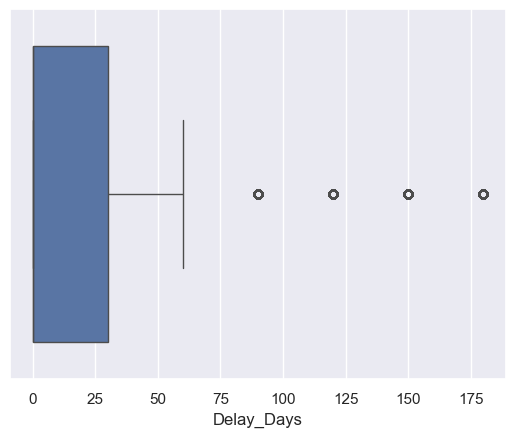

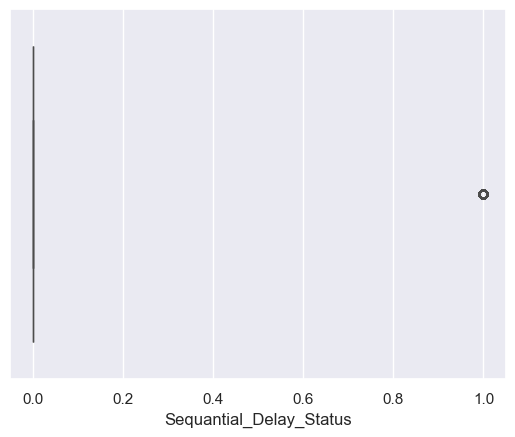

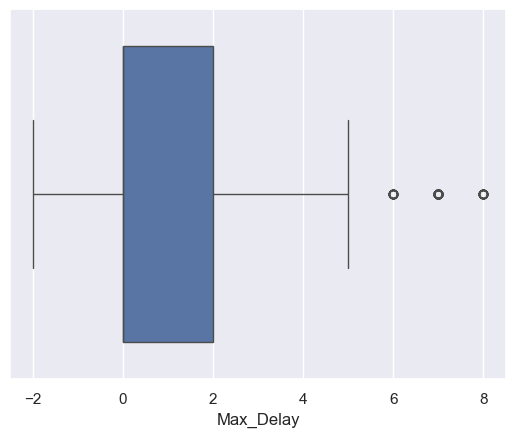

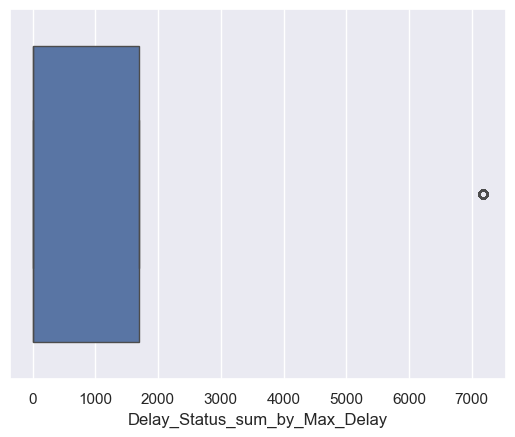

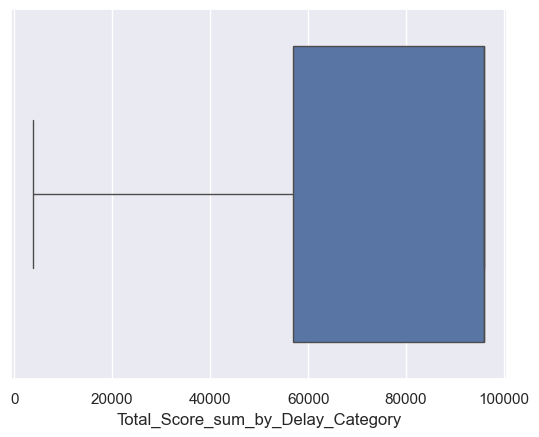

In [47]:
for i in data_for_lr[['Delay_Days','Sequantial_Delay_Status','Max_Delay',
                           'Delay_Status_sum_by_Max_Delay','Total_Score_sum_by_Delay_Category']]:
    sns.boxplot(data=data_for_lr,x=data_for_lr[i])
    plt.show()

In [48]:
numeric_data = data_for_lr.select_dtypes(include=['number'])
q1 = numeric_data.quantile(0.25)
q3 = numeric_data.quantile(0.75)
IQR = q3 - q1
Lower = q1 - 1.5 * IQR
Upper = q3 + 1.5 * IQR

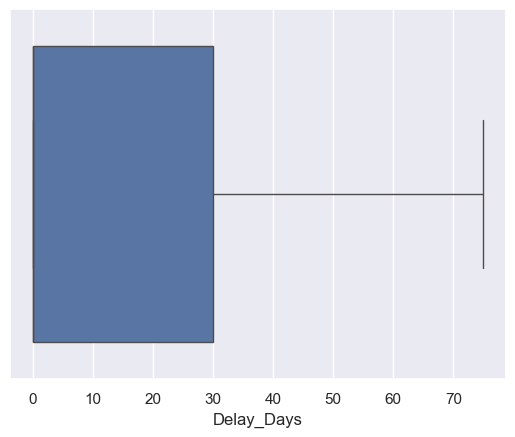

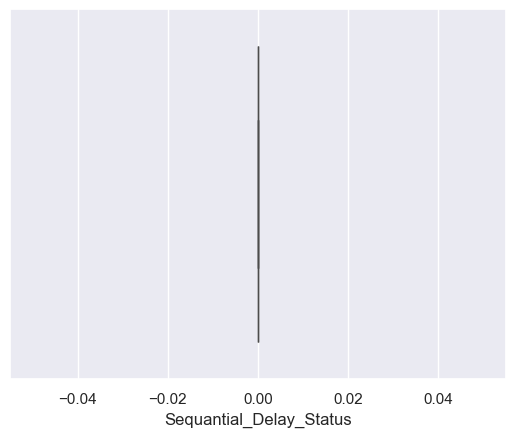

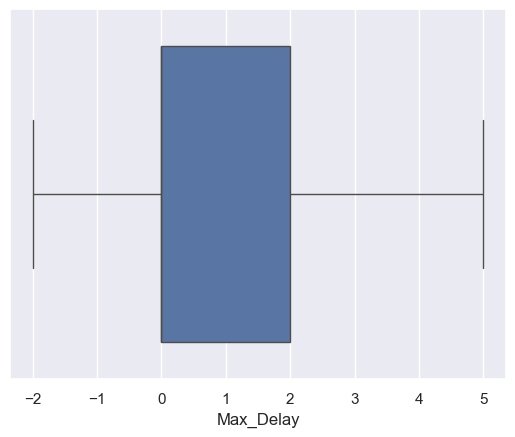

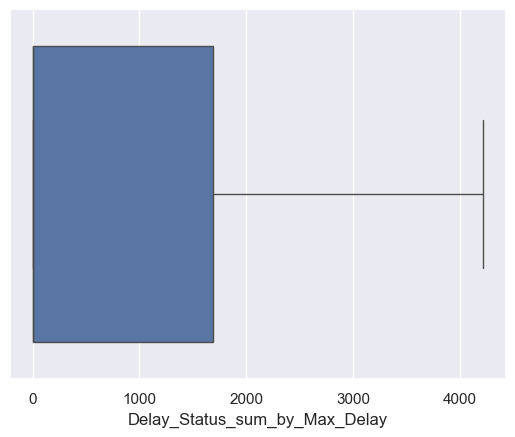

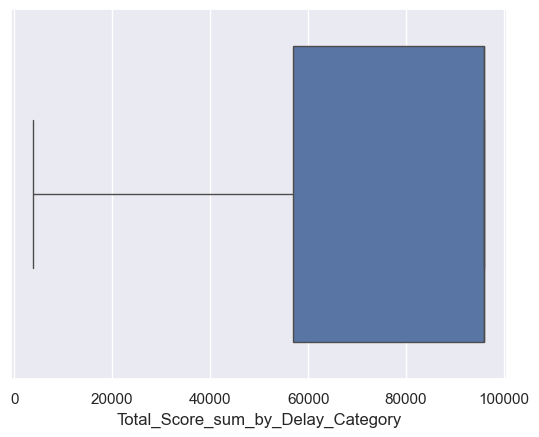

In [49]:
for i in data_for_lr[['Delay_Days','Sequantial_Delay_Status','Max_Delay',
                           'Delay_Status_sum_by_Max_Delay','Total_Score_sum_by_Delay_Category']]:
        data_for_lr[i] = np.where(data_for_lr[i] > Upper[i],Upper[i],data_for_lr[i])
        data_for_lr[i] = np.where(data_for_lr[i] < Lower[i],Lower[i],data_for_lr[i])
        sns.boxplot(data=data_for_lr,x=data_for_lr[i])
        plt.show()

In [50]:
data_for_lr.dtypes

SEX                                   object
EDUCATION                             object
MARRIAGE                              object
Delay_Days                           float64
Sequantial_Delay_Status              float64
Max_Delay                            float64
Delay_Status_sum_by_Max_Delay        float64
Total_Score_sum_by_Delay_Category    float64
default                                int64
dtype: object

In [51]:
for var in data_for_lr.columns[:-1]:
    if data_for_lr[var].dtypes != object:
        q1 = data_for_lr[var].quantile(0.25)
        q2 = data_for_lr[var].quantile(0.5)
        q3 = data_for_lr[var].quantile(0.75)

        ranges = [-np.inf, q1, q2, q3, np.inf]
        data_for_lr['category_' + var] = pd.cut(data_for_lr[var], bins=ranges, duplicates='drop')

        grouped = data_for_lr.groupby(['category_' + var, 'default'])['default'].count().unstack().reset_index()

        grouped['positive_prop'] = grouped[0] / grouped[0].sum()
        grouped['negative_prop'] = grouped[1] / grouped[1].sum()

        grouped['woe'] = np.log(grouped['positive_prop'] / grouped['negative_prop'])
        grouped.rename(columns={'woe': var + '_woe'}, inplace=True)
        data_for_lr = data_for_lr.merge(grouped[['category_' + var, var + '_woe']], how='left', on='category_' + var)
        
data_for_lr

C:\Users\Admin\AppData\Local\Temp\ipykernel_10000\264149206.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data_for_lr.groupby(['category_' + var, 'default'])['default'].count().unstack().reset_index()
C:\Users\Admin\AppData\Local\Temp\ipykernel_10000\264149206.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data_for_lr.groupby(['category_' + var, 'default'])['default'].count().unstack().reset_index()
C:\Users\Admin\AppData\Local\Temp\ipykernel_10000\264149206.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pan

,SEX,EDUCATION,MARRIAGE,Delay_Days,Sequantial_Delay_Status,Max_Delay,Delay_Status_sum_by_Max_Delay,Total_Score_sum_by_Delay_Category,default,category_Delay_Days,Delay_Days_woe,category_Sequantial_Delay_Status,Sequantial_Delay_Status_woe,category_Max_Delay,Max_Delay_woe,category_Delay_Status_sum_by_Max_Delay,Delay_Status_sum_by_Max_Delay_woe,category_Total_Score_sum_by_Delay_Category,Total_Score_sum_by_Delay_Category_woe
0,female,university,married,60.0,0.0,2.0,4222.5,56893.0,1,"(30.0, inf]",-1.372579,"(-inf, 0.0]",0.0,"(0.0, 2.0]",-0.853973,"(1689.0, inf]",-0.999276,"(-inf, 56893.0]",-0.965615
1,female,university,single,60.0,0.0,2.0,4222.5,56893.0,1,"(30.0, inf]",-1.372579,"(-inf, 0.0]",0.0,"(0.0, 2.0]",-0.853973,"(1689.0, inf]",-0.999276,"(-inf, 56893.0]",-0.965615
2,female,university,single,0.0,0.0,0.0,0.0,95960.0,0,"(-inf, 0.0]",0.761458,"(-inf, 0.0]",0.0,"(-inf, 0.0]",0.761458,"(-inf, 0.0]",0.761458,"(56893.0, 95960.0]",0.761458
3,female,university,married,0.0,0.0,0.0,0.0,95960.0,0,"(-inf, 0.0]",0.761458,"(-inf, 0.0]",0.0,"(-inf, 0.0]",0.761458,"(-inf, 0.0]",0.761458,"(56893.0, 95960.0]",0.761458
4,male,university,married,0.0,0.0,0.0,0.0,95960.0,0,"(-inf, 0.0]",0.761458,"(-inf, 0.0]",0.0,"(-inf, 0.0]",0.761458,"(-inf, 0.0]",0.761458,"(56893.0, 95960.0]",0.761458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,male,high school,married,0.0,0.0,0.0,0.0,95960.0,0,"(-inf, 0.0]",0.761458,"(-inf, 0.0]",0.0,"(-inf, 0.0]",0.761458,"(-inf, 0.0]",0.761458,"(56893.0, 95960.0]",0.761458
29996,male,high school,single,0.0,0.0,0.0,0.0,95960.0,0,"(-inf, 0.0]",0.761458,"(-inf, 0.0]",0.0,"(-inf, 0.0]",0.761458,"(-inf, 0.0]",0.761458,"(56893.0, 95960.0]",0.761458
29997,male,university,single,75.0,0.0,4.0,218.0,3900.0,1,"(30.0, inf]",-1.372579,"(-inf, 0.0]",0.0,"(2.0, inf]",-1.785190,"(0.0, 1689.0]",-0.880905,"(-inf, 56893.0]",-0.965615
29998,male,high school,married,30.0,0.0,1.0,1689.0,56893.0,1,"(0.0, 30.0]",-0.402983,"(-inf, 0.0]",0.0,"(0.0, 2.0]",-0.853973,"(0.0, 1689.0]",-0.880905,"(-inf, 56893.0]",-0.965615


In [52]:
data_for_lr

,SEX,EDUCATION,MARRIAGE,Delay_Days,Sequantial_Delay_Status,Max_Delay,Delay_Status_sum_by_Max_Delay,Total_Score_sum_by_Delay_Category,default,category_Delay_Days,Delay_Days_woe,category_Sequantial_Delay_Status,Sequantial_Delay_Status_woe,category_Max_Delay,Max_Delay_woe,category_Delay_Status_sum_by_Max_Delay,Delay_Status_sum_by_Max_Delay_woe,category_Total_Score_sum_by_Delay_Category,Total_Score_sum_by_Delay_Category_woe
0,female,university,married,60.0,0.0,2.0,4222.5,56893.0,1,"(30.0, inf]",-1.372579,"(-inf, 0.0]",0.0,"(0.0, 2.0]",-0.853973,"(1689.0, inf]",-0.999276,"(-inf, 56893.0]",-0.965615
1,female,university,single,60.0,0.0,2.0,4222.5,56893.0,1,"(30.0, inf]",-1.372579,"(-inf, 0.0]",0.0,"(0.0, 2.0]",-0.853973,"(1689.0, inf]",-0.999276,"(-inf, 56893.0]",-0.965615
2,female,university,single,0.0,0.0,0.0,0.0,95960.0,0,"(-inf, 0.0]",0.761458,"(-inf, 0.0]",0.0,"(-inf, 0.0]",0.761458,"(-inf, 0.0]",0.761458,"(56893.0, 95960.0]",0.761458
3,female,university,married,0.0,0.0,0.0,0.0,95960.0,0,"(-inf, 0.0]",0.761458,"(-inf, 0.0]",0.0,"(-inf, 0.0]",0.761458,"(-inf, 0.0]",0.761458,"(56893.0, 95960.0]",0.761458
4,male,university,married,0.0,0.0,0.0,0.0,95960.0,0,"(-inf, 0.0]",0.761458,"(-inf, 0.0]",0.0,"(-inf, 0.0]",0.761458,"(-inf, 0.0]",0.761458,"(56893.0, 95960.0]",0.761458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,male,high school,married,0.0,0.0,0.0,0.0,95960.0,0,"(-inf, 0.0]",0.761458,"(-inf, 0.0]",0.0,"(-inf, 0.0]",0.761458,"(-inf, 0.0]",0.761458,"(56893.0, 95960.0]",0.761458
29996,male,high school,single,0.0,0.0,0.0,0.0,95960.0,0,"(-inf, 0.0]",0.761458,"(-inf, 0.0]",0.0,"(-inf, 0.0]",0.761458,"(-inf, 0.0]",0.761458,"(56893.0, 95960.0]",0.761458
29997,male,university,single,75.0,0.0,4.0,218.0,3900.0,1,"(30.0, inf]",-1.372579,"(-inf, 0.0]",0.0,"(2.0, inf]",-1.785190,"(0.0, 1689.0]",-0.880905,"(-inf, 56893.0]",-0.965615
29998,male,high school,married,30.0,0.0,1.0,1689.0,56893.0,1,"(0.0, 30.0]",-0.402983,"(-inf, 0.0]",0.0,"(0.0, 2.0]",-0.853973,"(0.0, 1689.0]",-0.880905,"(-inf, 56893.0]",-0.965615


In [53]:
for var in data_for_lr.columns:
    if data_for_lr[var].dtypes==object:
        
        grouped = data_for_lr.groupby([var, 'default'])['default'].count().unstack().reset_index()

        grouped['positive_prop'] = grouped[0] / grouped[0].sum()
        grouped['negative_prop'] = grouped[1] / grouped[1].sum()

        grouped['woe'] = np.log(grouped['positive_prop'] / grouped['negative_prop'])

        grouped.rename(columns={'woe':var+'_woe'}, inplace=True)
        data_for_lr = data_for_lr.merge(grouped[[var,var+'_woe']], how='left', on=var)

data_for_lr

,SEX,EDUCATION,MARRIAGE,Delay_Days,Sequantial_Delay_Status,Max_Delay,Delay_Status_sum_by_Max_Delay,Total_Score_sum_by_Delay_Category,default,category_Delay_Days,Delay_Days_woe,category_Sequantial_Delay_Status,Sequantial_Delay_Status_woe,category_Max_Delay,Max_Delay_woe,category_Delay_Status_sum_by_Max_Delay,Delay_Status_sum_by_Max_Delay_woe,category_Total_Score_sum_by_Delay_Category,Total_Score_sum_by_Delay_Category_woe,SEX_woe,EDUCATION_woe,MARRIAGE_woe
0,female,university,married,60.0,0.0,2.0,4222.5,56893.0,1,"(30.0, inf]",-1.372579,"(-inf, 0.0]",0.0,"(0.0, 2.0]",-0.853973,"(1689.0, inf]",-0.999276,"(-inf, 56893.0]",-0.965615,0.079777,-0.091416,-0.076822
1,female,university,single,60.0,0.0,2.0,4222.5,56893.0,1,"(30.0, inf]",-1.372579,"(-inf, 0.0]",0.0,"(0.0, 2.0]",-0.853973,"(1689.0, inf]",-0.999276,"(-inf, 56893.0]",-0.965615,0.079777,-0.091416,0.070563
2,female,university,single,0.0,0.0,0.0,0.0,95960.0,0,"(-inf, 0.0]",0.761458,"(-inf, 0.0]",0.0,"(-inf, 0.0]",0.761458,"(-inf, 0.0]",0.761458,"(56893.0, 95960.0]",0.761458,0.079777,-0.091416,0.070563
3,female,university,married,0.0,0.0,0.0,0.0,95960.0,0,"(-inf, 0.0]",0.761458,"(-inf, 0.0]",0.0,"(-inf, 0.0]",0.761458,"(-inf, 0.0]",0.761458,"(56893.0, 95960.0]",0.761458,0.079777,-0.091416,-0.076822
4,male,university,married,0.0,0.0,0.0,0.0,95960.0,0,"(-inf, 0.0]",0.761458,"(-inf, 0.0]",0.0,"(-inf, 0.0]",0.761458,"(-inf, 0.0]",0.761458,"(56893.0, 95960.0]",0.761458,-0.115154,-0.091416,-0.076822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,male,high school,married,0.0,0.0,0.0,0.0,95960.0,0,"(-inf, 0.0]",0.761458,"(-inf, 0.0]",0.0,"(-inf, 0.0]",0.761458,"(-inf, 0.0]",0.761458,"(56893.0, 95960.0]",0.761458,-0.115154,-0.168463,-0.076822
29996,male,high school,single,0.0,0.0,0.0,0.0,95960.0,0,"(-inf, 0.0]",0.761458,"(-inf, 0.0]",0.0,"(-inf, 0.0]",0.761458,"(-inf, 0.0]",0.761458,"(56893.0, 95960.0]",0.761458,-0.115154,-0.168463,0.070563
29997,male,university,single,75.0,0.0,4.0,218.0,3900.0,1,"(30.0, inf]",-1.372579,"(-inf, 0.0]",0.0,"(2.0, inf]",-1.785190,"(0.0, 1689.0]",-0.880905,"(-inf, 56893.0]",-0.965615,-0.115154,-0.091416,0.070563
29998,male,high school,married,30.0,0.0,1.0,1689.0,56893.0,1,"(0.0, 30.0]",-0.402983,"(-inf, 0.0]",0.0,"(0.0, 2.0]",-0.853973,"(0.0, 1689.0]",-0.880905,"(-inf, 56893.0]",-0.965615,-0.115154,-0.168463,-0.076822


In [54]:
data_for_lr.isnull().sum()

SEX                                            0
EDUCATION                                      0
MARRIAGE                                       0
Delay_Days                                     0
Sequantial_Delay_Status                        0
Max_Delay                                      0
Delay_Status_sum_by_Max_Delay                  0
Total_Score_sum_by_Delay_Category              0
default                                        0
category_Delay_Days                            0
Delay_Days_woe                                 0
category_Sequantial_Delay_Status               0
Sequantial_Delay_Status_woe                    0
category_Max_Delay                             0
Max_Delay_woe                                  0
category_Delay_Status_sum_by_Max_Delay         0
Delay_Status_sum_by_Max_Delay_woe              0
category_Total_Score_sum_by_Delay_Category     0
Total_Score_sum_by_Delay_Category_woe          0
SEX_woe                                        0
EDUCATION_woe       

In [55]:
data_for_lr[['EDUCATION_woe', 'default']].value_counts()

EDUCATION_woe  default
-0.091416      0          10700
 0.176140      0           8549
-0.168463      0           3680
-0.091416      1           3330
 0.176140      1           2036
-0.168463      1           1237
 1.287438      0            421
               1             33
Name: count, dtype: int64

In [56]:
data_for_models[['EDUCATION']].value_counts()

EDUCATION      
university         14030
graduate school    10585
high school         4917
others               454
not educated          14
Name: count, dtype: int64

In [57]:
data_for_lr['EDUCATION_woe'] = data_for_lr['EDUCATION_woe'].fillna(data_for_lr['EDUCATION_woe'].min())

In [58]:
data_for_lr.isnull().sum()

SEX                                           0
EDUCATION                                     0
MARRIAGE                                      0
Delay_Days                                    0
Sequantial_Delay_Status                       0
Max_Delay                                     0
Delay_Status_sum_by_Max_Delay                 0
Total_Score_sum_by_Delay_Category             0
default                                       0
category_Delay_Days                           0
Delay_Days_woe                                0
category_Sequantial_Delay_Status              0
Sequantial_Delay_Status_woe                   0
category_Max_Delay                            0
Max_Delay_woe                                 0
category_Delay_Status_sum_by_Max_Delay        0
Delay_Status_sum_by_Max_Delay_woe             0
category_Total_Score_sum_by_Delay_Category    0
Total_Score_sum_by_Delay_Category_woe         0
SEX_woe                                       0
EDUCATION_woe                           

In [59]:
woe_features = data_for_lr.filter(regex='_woe$', axis=1)
woe_features.columns

Index(['Delay_Days_woe', 'Sequantial_Delay_Status_woe', 'Max_Delay_woe',
       'Delay_Status_sum_by_Max_Delay_woe',
       'Total_Score_sum_by_Delay_Category_woe', 'SEX_woe', 'EDUCATION_woe',
       'MARRIAGE_woe'],
      dtype='object')

In [60]:
data_for_lr.columns

Index(['SEX', 'EDUCATION', 'MARRIAGE', 'Delay_Days', 'Sequantial_Delay_Status',
       'Max_Delay', 'Delay_Status_sum_by_Max_Delay',
       'Total_Score_sum_by_Delay_Category', 'default', 'category_Delay_Days',
       'Delay_Days_woe', 'category_Sequantial_Delay_Status',
       'Sequantial_Delay_Status_woe', 'category_Max_Delay', 'Max_Delay_woe',
       'category_Delay_Status_sum_by_Max_Delay',
       'Delay_Status_sum_by_Max_Delay_woe',
       'category_Total_Score_sum_by_Delay_Category',
       'Total_Score_sum_by_Delay_Category_woe', 'SEX_woe', 'EDUCATION_woe',
       'MARRIAGE_woe'],
      dtype='object')

In [61]:
data_for_lr = data_for_lr[['Delay_Days_woe', 'Sequantial_Delay_Status_woe', 'Max_Delay_woe',
       'Delay_Status_sum_by_Max_Delay_woe',
       'Total_Score_sum_by_Delay_Category_woe', 'SEX_woe', 'EDUCATION_woe',
       'MARRIAGE_woe','default']]

In [62]:
data_for_tb = pd.get_dummies(data_for_tb, drop_first=True,dtype=int)

In [63]:
inputs_lr = data_for_lr.drop('default', axis=1)
output_lr = data_for_lr['default']

X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(inputs_lr, output_lr, test_size=0.3, random_state=42)

In [64]:
inputs_tb = data_for_tb.drop('default', axis=1)
output_tb = data_for_tb['default']

X_train_tb, X_test_tb, y_train_tb, y_test_tb = train_test_split(inputs_tb, output_tb, test_size=0.3, random_state=42)

In [65]:
inputs_cat = data_for_cb_custom.drop('default', axis=1)
outputs_cat = data_for_cb_custom['default']

columns_to_fill = ['SEX', 'EDUCATION', 'MARRIAGE']

X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(inputs_cat, outputs_cat, test_size=0.3, random_state=42)

In [66]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score


def train_and_evaluate_model(model_name, model, X_train, y_train, X_test, y_test):
    try:
        model.fit(X_train, y_train)
        
        y_pred_train = model.predict(X_train)
        y_prob_train = model.predict_proba(X_train)[:, 1]

        roc_prob_train = roc_auc_score(y_train, y_prob_train)
        gini_prob_train = roc_prob_train * 2 - 1
        confusion_matrix_result_train = confusion_matrix(y_train, y_pred_train)
        classification_report_result_train = classification_report(y_train, y_pred_train)
        
        print(f'Model Performance for {model_name}')
        print('Train Gini prob is', gini_prob_train * 100)
        print(classification_report_result_train)
        print(confusion_matrix_result_train)

        y_pred_test = model.predict(X_test)
        y_prob_test = model.predict_proba(X_test)[:, 1]

        roc_prob_test = roc_auc_score(y_test, y_prob_test)
        gini_prob_test = roc_prob_test * 2 - 1
        confusion_matrix_result_test = confusion_matrix(y_test, y_pred_test)
        classification_report_result_test = classification_report(y_test, y_pred_test)

        print(f'Model Performance for {model_name}')
        print('Test Gini prob is', gini_prob_test * 100)
        print(classification_report_result_test)
        print(confusion_matrix_result_test)

        return [gini_prob_train, gini_prob_test]

    except Exception as e:
        print(f"An error occurred while evaluating the model {model_name}: {e}")
        return None

In [68]:
from sklearn.model_selection import cross_val_score
import optuna

def best_params_for_model(trial):
    param_xgb = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 3000),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 1.0),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'subsample': trial.suggest_uniform('subsample', 0.5,1),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5,1), 
        'gamma': trial.suggest_int('gamma', 0,10),
        'min_child_weight': trial.suggest_int('min_child_weight', 0,10),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 0.001, 1.0),
        'scale_pos_weight': trial.suggest_uniform('scale_pos_weight', 0.5,2)
}
    xgb_clf = XGBClassifier(**param_xgb)

    auc = cross_val_score(xgb_clf, X_train_tb, y_train_tb, cv=3, scoring='neg_log_loss', n_jobs=-1).mean()
    return auc



study = optuna.create_study(direction='minimize')
study.optimize(best_params_for_model, n_trials=20)

print('Best trial:')
best_params_xgb = study.best_params
print('  Value: {:.3f}'.format(study.best_value))
print('  Params: ', best_params_xgb)

best_xgb_model = XGBClassifier(**best_params_xgb)

[I 2025-01-20 02:35:34,595] A new study created in memory with name: no-name-5404d21b-e901-4721-bee4-1a1453f1dc98
C:\Users\Admin\AppData\Local\Temp\ipykernel_10000\1325519991.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 1.0),
C:\Users\Admin\AppData\Local\Temp\ipykernel_10000\1325519991.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5,1),
C:\Users\Admin\AppData\Local\Temp\ipykernel_10000\1325519991.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. 

Best trial:
  Value: -0.917
  Params:  {'n_estimators': 754, 'learning_rate': 0.7043152820748094, 'max_depth': 14, 'subsample': 0.6816158445612904, 'colsample_bytree': 0.7433337153230003, 'gamma': 0, 'min_child_weight': 1, 'reg_alpha': 0.7306196025346617, 'scale_pos_weight': 1.9854886784680619}


In [70]:
from sklearn.model_selection import cross_val_score
import optuna

def best_params_for_model(trial):
    param_lgb = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 2000),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 1.0),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'num_leaves': trial.suggest_int('num_leaves', 10, 300),
        'min_data_in_leaf': trial.suggest_int('min_data_leaf',10,100),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1,10)
        
    }

    lgb_clf = LGBMClassifier(**param_lgb)

    auc = cross_val_score(lgb_clf, X_train_tb, y_train_tb, cv=3, scoring='roc_auc', n_jobs=-1).mean()
    return auc

study = optuna.create_study(direction='maximize')
study.optimize(best_params_for_model, n_trials=20)

print('Best trial:')
best_params_lgb = study.best_params
print('  Value: {:.3f}'.format(study.best_value))
print('  Params: ', best_params_lgb)

best_lgb_model = LGBMClassifier(**best_params_lgb)

[I 2025-01-20 02:42:33,405] A new study created in memory with name: no-name-bbeb2091-5243-46d0-97c3-d6db1ee3413b
C:\Users\Admin\AppData\Local\Temp\ipykernel_10000\1037311616.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 1.0),
C:\Users\Admin\AppData\Local\Temp\ipykernel_10000\1037311616.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\Admin\AppData\Local\Temp\ipykernel_10000\1037311616.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/rel

Best trial:
  Value: 0.775
  Params:  {'n_estimators': 920, 'learning_rate': 0.004147792826246767, 'max_depth': 4, 'num_leaves': 15, 'min_data_leaf': 83, 'feature_fraction': 0.6381231415030788, 'bagging_fraction': 0.99787367076969, 'bagging_freq': 9}


In [72]:
def best_params_for_model(trial):

    param_cb = {
        'iterations': trial.suggest_int('iterations', 100, 2000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0, log = True),
        'depth': trial.suggest_int('depth', 3, 10),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 0.01, 10.0, log = True),
        'loss_function': trial.suggest_categorical('loss_function', ['Logloss']),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0.0, 1.0),
        'random_strength': trial.suggest_float('random_strength', 0.0, 10.0)
    }
    cb_clf = CatBoostClassifier(**param_cb)

    auc = cross_val_score(cb_clf, X_train_tb, y_train_tb, cv=3, scoring='roc_auc', n_jobs=-1).mean()
    return auc



study = optuna.create_study(direction='maximize')
study.optimize(best_params_for_model, n_trials=10)

print('Best trial:')
best_params_cb = study.best_params
print('  Value: {:.3f}'.format(study.best_value))
print('  Params: ', best_params_cb)

best_cb_model = CatBoostClassifier(**best_params_cb)

[I 2025-01-20 02:51:19,973] A new study created in memory with name: no-name-7c923b20-3463-4de8-8878-9e49a52e09b5
[I 2025-01-20 02:55:27,321] Trial 0 finished with value: 0.7268062068281397 and parameters: {'iterations': 1495, 'learning_rate': 0.2180133132689119, 'depth': 9, 'l2_leaf_reg': 5.553094753529342, 'loss_function': 'Logloss', 'bagging_temperature': 0.5758222078816566, 'random_strength': 5.477989904741736}. Best is trial 0 with value: 0.7268062068281397.
[I 2025-01-20 03:00:00,305] Trial 1 finished with value: 0.7188916847329568 and parameters: {'iterations': 1621, 'learning_rate': 0.3420837929429498, 'depth': 9, 'l2_leaf_reg': 1.0034109002590705, 'loss_function': 'Logloss', 'bagging_temperature': 0.2725761961302746, 'random_strength': 1.8334051874837498}. Best is trial 0 with value: 0.7268062068281397.
[I 2025-01-20 03:06:23,424] Trial 2 finished with value: 0.6852868146661916 and parameters: {'iterations': 1195, 'learning_rate': 0.6954712387151744, 'depth': 10, 'l2_leaf_reg'

Best trial:
  Value: 0.774
  Params:  {'iterations': 1214, 'learning_rate': 0.014045730717727451, 'depth': 3, 'l2_leaf_reg': 0.07775438260634314, 'loss_function': 'Logloss', 'bagging_temperature': 0.48111760911977963, 'random_strength': 1.754141068225341}


In [74]:
def best_params_for_model(trial):

    param_cb_cust = {
        'iterations': trial.suggest_int('iterations', 100, 2000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0, log = True),
        'depth': trial.suggest_int('depth', 3, 10),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 0.01, 10.0, log = True),
        'loss_function': trial.suggest_categorical('loss_function', ['Logloss']),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0.0, 1.0),
        'random_strength': trial.suggest_float('random_strength', 0.0, 10.0),
        'cat_features': ([1,2,3]) 
    }

    cb_clf = CatBoostClassifier(**param_cb_cust)

    auc = cross_val_score(cb_clf, X_train_cat, y_train_cat, cv=3, scoring='roc_auc', n_jobs=-1).mean()
    return auc



study = optuna.create_study(direction='maximize')
study.optimize(best_params_for_model, n_trials=10)

print('Best trial:')
best_params_cb_cust = study.best_params
print('  Value: {:.3f}'.format(study.best_value))
print('  Params: ', best_params_cb_cust)

best_cb_custom_model = CatBoostClassifier(**best_params_cb_cust)

[I 2025-01-20 03:22:22,128] A new study created in memory with name: no-name-9b41e794-72fe-47ac-945d-fbe50212b0e6
[I 2025-01-20 03:41:21,029] Trial 0 finished with value: 0.732271182901557 and parameters: {'iterations': 1428, 'learning_rate': 0.03807204687292019, 'depth': 10, 'l2_leaf_reg': 0.04657061929560465, 'loss_function': 'Logloss', 'bagging_temperature': 0.8099432705393915, 'random_strength': 6.657320071235526}. Best is trial 0 with value: 0.732271182901557.
[I 2025-01-20 03:46:18,223] Trial 1 finished with value: 0.7408213686473942 and parameters: {'iterations': 920, 'learning_rate': 0.09600421476532324, 'depth': 7, 'l2_leaf_reg': 0.20175219895097388, 'loss_function': 'Logloss', 'bagging_temperature': 0.9407838754471456, 'random_strength': 4.149416681946989}. Best is trial 1 with value: 0.7408213686473942.
[I 2025-01-20 03:49:46,025] Trial 2 finished with value: 0.7055543767315405 and parameters: {'iterations': 425, 'learning_rate': 0.25335887146876623, 'depth': 8, 'l2_leaf_reg

Best trial:
  Value: 0.770
  Params:  {'iterations': 106, 'learning_rate': 0.07951916596576263, 'depth': 10, 'l2_leaf_reg': 0.026462189274231124, 'loss_function': 'Logloss', 'bagging_temperature': 0.16448135364516014, 'random_strength': 9.349564614890483}


In [76]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


def best_params_for_model(trial):
    param_rf = {
        'n_estimators': trial.suggest_int('n_estimators', low=100, high=400),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2']),
        'max_depth': trial.suggest_int('max_depth', low=10, high=40),
        'min_samples_split': trial.suggest_int('min_samples_split', low=20, high=50),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', low=5, high=10)
    }


    rf_clf = RandomForestClassifier(**param_rf)

    auc = cross_val_score(rf_clf, X_train_tb, y_train_tb, cv=3, scoring='roc_auc', n_jobs=-1).mean()
    return auc

study = optuna.create_study(direction='maximize')
study.optimize(best_params_for_model, n_trials=20) 

print('Best trial:')
best_params_rf = study.best_params
print('  Value: {:.3f}'.format(study.best_value))
print('  Params: ', best_params_rf)

best_rf_model = RandomForestClassifier(**best_params_rf)

[I 2025-01-20 04:43:26,160] A new study created in memory with name: no-name-1615aeab-0589-42a5-91fe-6506d68fcbcb
[I 2025-01-20 04:43:39,185] Trial 0 finished with value: 0.7728285011479309 and parameters: {'n_estimators': 132, 'max_features': 'log2', 'max_depth': 19, 'min_samples_split': 45, 'min_samples_leaf': 8}. Best is trial 0 with value: 0.7728285011479309.
[I 2025-01-20 04:44:09,029] Trial 1 finished with value: 0.7725409608494168 and parameters: {'n_estimators': 302, 'max_features': 'sqrt', 'max_depth': 26, 'min_samples_split': 38, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.7728285011479309.
[I 2025-01-20 04:44:28,726] Trial 2 finished with value: 0.7747734478775382 and parameters: {'n_estimators': 282, 'max_features': 'log2', 'max_depth': 12, 'min_samples_split': 44, 'min_samples_leaf': 9}. Best is trial 2 with value: 0.7747734478775382.
[I 2025-01-20 04:44:45,037] Trial 3 finished with value: 0.7732022384113594 and parameters: {'n_estimators': 183, 'max_features': 

Best trial:
  Value: 0.775
  Params:  {'n_estimators': 282, 'max_features': 'log2', 'max_depth': 12, 'min_samples_split': 44, 'min_samples_leaf': 9}


In [78]:
default_and_optimized_models = []

log_reg_def = LogisticRegression(random_state=42)
xgb_model_def = XGBClassifier(random_state=42)
lgb_model_def = LGBMClassifier(random_state=42)
catboost_model_def = CatBoostClassifier(random_state=42)
catboost_model_custom = CatBoostClassifier(cat_features=['SEX', 'EDUCATION', 'MARRIAGE'], random_state=42)
rf_model_def = RandomForestClassifier(random_state = 42)
best_xgb_model = XGBClassifier(**best_params_xgb)
best_lgb_model = LGBMClassifier(**best_params_lgb)
best_cb_model = CatBoostClassifier(**best_params_cb)
best_cb_custom_model = CatBoostClassifier(**best_params_cb_cust)
best_rf_model = RandomForestClassifier(**best_params_rf)
default_and_optimized_models.extend([
    ('Logistic_Regression', log_reg_def),
    ('RandomForest', rf_model_def),
    ('XGBoost', xgb_model_def),
    ('LightGBM', lgb_model_def),
    ('CatBoost', catboost_model_def),
    ('CatBoost_Custom', catboost_model_custom),
    ('XGBoost Optuna', best_xgb_model),
    ('LightGBM Optuna', best_lgb_model),
    ('CatBoost Optuna', best_cb_model),
    ('CatBoost_Custom_Optuna', best_cb_custom_model),
    ('Random_Forest_Optuna', best_rf_model)
    
])

In [80]:
gini_df = pd.DataFrame(columns=['Model', 'Train Gini', 'Test Gini'])

for model_name, model in default_and_optimized_models:
    if model_name == 'CatBoost_Custom' or  model_name == 'CatBoost_Custom_Optuna':
        gini_prob = train_and_evaluate_model(model_name, model, X_train_cat, y_train_cat, X_test_cat, y_test_cat)
    elif model_name == 'Logistic_Regression':
        gini_prob = train_and_evaluate_model(model_name, model, X_train_lr, y_train_lr, X_test_lr, y_test_lr)   
    else:
        gini_prob = train_and_evaluate_model(model_name, model, X_train_tb, y_train_tb, X_test_tb, y_test_tb)

    if gini_prob is not None:
        gini_df = pd.concat([gini_df, pd.DataFrame({'Model': [model_name], 'Train Gini': [gini_prob[0]], 'Test Gini': [gini_prob[1]]})], ignore_index=True)

gini_df_sorted = gini_df.sort_values(by='Test Gini', ascending=False)

gini_df_sorted

Model Performance for Logistic_Regression
Train Gini prob is 47.75037080597792
              precision    recall  f1-score   support

           0       0.83      0.93      0.87     16324
           1       0.56      0.32      0.41      4676

    accuracy                           0.79     21000
   macro avg       0.69      0.62      0.64     21000
weighted avg       0.77      0.79      0.77     21000

[[15180  1144]
 [ 3197  1479]]
Model Performance for Logistic_Regression
Test Gini prob is 46.20209589517626
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      7040
           1       0.53      0.31      0.40      1960

    accuracy                           0.79      9000
   macro avg       0.68      0.62      0.63      9000
weighted avg       0.76      0.79      0.77      9000

[[6504  536]
 [1345  615]]


C:\Users\Admin\AppData\Local\Temp\ipykernel_10000\346355392.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  gini_df = pd.concat([gini_df, pd.DataFrame({'Model': [model_name], 'Train Gini': [gini_prob[0]], 'Test Gini': [gini_prob[1]]})], ignore_index=True)


Model Performance for RandomForest
Train Gini prob is 99.99922705085156
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16324
           1       1.00      1.00      1.00      4676

    accuracy                           1.00     21000
   macro avg       1.00      1.00      1.00     21000
weighted avg       1.00      1.00      1.00     21000

[[16321     3]
 [    8  4668]]
Model Performance for RandomForest
Test Gini prob is 49.27882942949908
              precision    recall  f1-score   support

           0       0.83      0.92      0.88      7040
           1       0.55      0.33      0.41      1960

    accuracy                           0.79      9000
   macro avg       0.69      0.63      0.64      9000
weighted avg       0.77      0.79      0.77      9000

[[6509  531]
 [1315  645]]
Model Performance for XGBoost
Train Gini prob is 83.45044735676544
              precision    recall  f1-score   support

           0       0.88

,Model,Train Gini,Test Gini
7,LightGBM Optuna,0.581205,0.533910
9,Random_Forest_Optuna,0.677512,0.533794
8,CatBoost Optuna,0.576078,0.533673
5,CatBoost_Custom,0.694806,0.530306
4,CatBoost,0.723495,0.529415
3,LightGBM,0.722456,0.522816
2,XGBoost,0.834504,0.495109
1,RandomForest,0.999992,0.492788
0,Logistic_Regression,0.477504,0.462021
6,XGBoost Optuna,0.999999,0.411271


In [82]:
gini_df_sorted

,Model,Train Gini,Test Gini
7,LightGBM Optuna,0.581205,0.533910
9,Random_Forest_Optuna,0.677512,0.533794
8,CatBoost Optuna,0.576078,0.533673
5,CatBoost_Custom,0.694806,0.530306
4,CatBoost,0.723495,0.529415
3,LightGBM,0.722456,0.522816
2,XGBoost,0.834504,0.495109
1,RandomForest,0.999992,0.492788
0,Logistic_Regression,0.477504,0.462021
6,XGBoost Optuna,0.999999,0.411271


In [84]:
from mlxtend.classifier import StackingCVClassifier

In [94]:
clf1 = best_lgb_model
clf2 = log_reg_def

In [96]:
meta_classifier = best_cb_model

In [98]:
stacking_classifier = StackingCVClassifier(classifiers=[clf1, clf2],
                                           meta_classifier=meta_classifier,
                                           cv=5,
                                           use_probas=True,
                                           use_features_in_secondary=True,
                                           verbose=1,
                                           random_state=42)

In [100]:
train_and_evaluate_model('Stacking Classifier with Catboost and XGBoost', stacking_classifier, X_train_tb, y_train_tb, X_test_tb, y_test_tb)

Fitting 2 classifiers...
Fitting classifier1: lgbmclassifier (1/2)
[LightGBM] [Warning] Unknown parameter: min_data_leaf
[LightGBM] [Warning] feature_fraction is set=0.6381231415030788, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6381231415030788
[LightGBM] [Warning] bagging_fraction is set=0.99787367076969, subsample=1.0 will be ignored. Current value: bagging_fraction=0.99787367076969
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: min_data_leaf
[LightGBM] [Warning] feature_fraction is set=0.6381231415030788, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6381231415030788
[LightGBM] [Warning] bagging_fraction is set=0.99787367076969, subsample=1.0 will be ignored. Current value: bagging_fraction=0.99787367076969
[LightGBM] [Warning] bagging_freq is set=9,

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[LightGBM] [Warning] Unknown parameter: min_data_leaf
[LightGBM] [Warning] feature_fraction is set=0.6381231415030788, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6381231415030788
[LightGBM] [Warning] bagging_fraction is set=0.99787367076969, subsample=1.0 will be ignored. Current value: bagging_fraction=0.99787367076969
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: min_data_leaf
[LightGBM] [Warning] feature_fraction is set=0.6381231415030788, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6381231415030788
[LightGBM] [Warning] bagging_fraction is set=0.99787367076969, subsample=1.0 will be ignored. Current value: bagging_fraction=0.99787367076969
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[L

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0:	learn: 0.6855892	total: 9.44ms	remaining: 11.4s
1:	learn: 0.6778470	total: 19.5ms	remaining: 11.8s
2:	learn: 0.6704986	total: 32.2ms	remaining: 13s
3:	learn: 0.6633265	total: 53.1ms	remaining: 16s
4:	learn: 0.6563951	total: 83.2ms	remaining: 20.1s
5:	learn: 0.6499012	total: 109ms	remaining: 22s
6:	learn: 0.6432809	total: 138ms	remaining: 23.8s
7:	learn: 0.6370361	total: 167ms	remaining: 25.2s
8:	learn: 0.6311783	total: 250ms	remaining: 33.5s
9:	learn: 0.6255662	total: 297ms	remaining: 35.7s
10:	learn: 0.6200722	total: 315ms	remaining: 34.4s
11:	learn: 0.6150509	total: 332ms	remaining: 33.2s
12:	learn: 0.6098435	total: 349ms	remaining: 32.3s
13:	learn: 0.6048615	total: 368ms	remaining: 31.6s
14:	learn: 0.6000631	total: 388ms	remaining: 31s
15:	learn: 0.5954055	total: 409ms	remaining: 30.6s
16:	learn: 0.5908607	total: 428ms	remaining: 30.2s
17:	learn: 0.5863201	total: 448ms	remaining: 29.8s
18:	learn: 0.5820436	total: 487ms	remaining: 30.7s
19:	learn: 0.5776566	total: 510ms	remaining:

[0.5854651445524954, 0.5355918802179962]

In [102]:
import shap
import matplotlib.pyplot as plt
import pandas as pd

def plot_feature_importances(model, feature_names, normalize=True):
    importances = model.feature_importances_
    
    if normalize:
        importances = importances / importances.sum() 
    
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by="Importance", ascending=False)
    
    plt.figure(figsize=(10, 9))
    plt.barh(importance_df['Feature'], importance_df['Importance'])
    plt.title("Feature Importances")
    plt.xlabel("Normalized Importance Score" if normalize else "Importance Score")
    plt.ylabel("Feature")
    plt.gca().invert_yaxis()
    plt.show()
    
    return importance_df

def compute_and_plot_shap_and_importances(model_name, model, X_train, feature_names=None):
    try:
        explainer = shap.Explainer(model, X_train)
        shap_values = explainer(X_train)

        print(f"SHAP Values Summary for {model_name}")
        plt.figure(figsize=(10, 6))
        shap.summary_plot(shap_values, X_train, feature_names=feature_names, show=False)
        plt.tight_layout()
        plt.show()

        feature_importance_df = plot_feature_importances(model, X_train.columns, normalize=True)
        return feature_importance_df

    except Exception as e:
        print(f"An error occurred while computing SHAP values and feature importances for {model_name}: {e}")
        return None

100%|===================| 41998/42000 [71:26<00:00]        

SHAP Values Summary for <catboost.core.CatBoostClassifier object at 0x000001C5513A63C0>


<Figure size 1000x600 with 0 Axes>

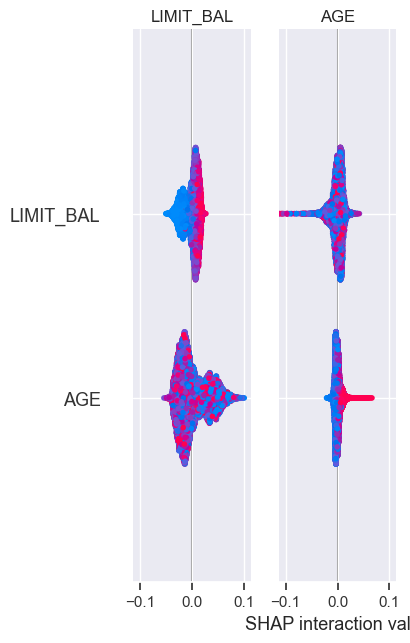

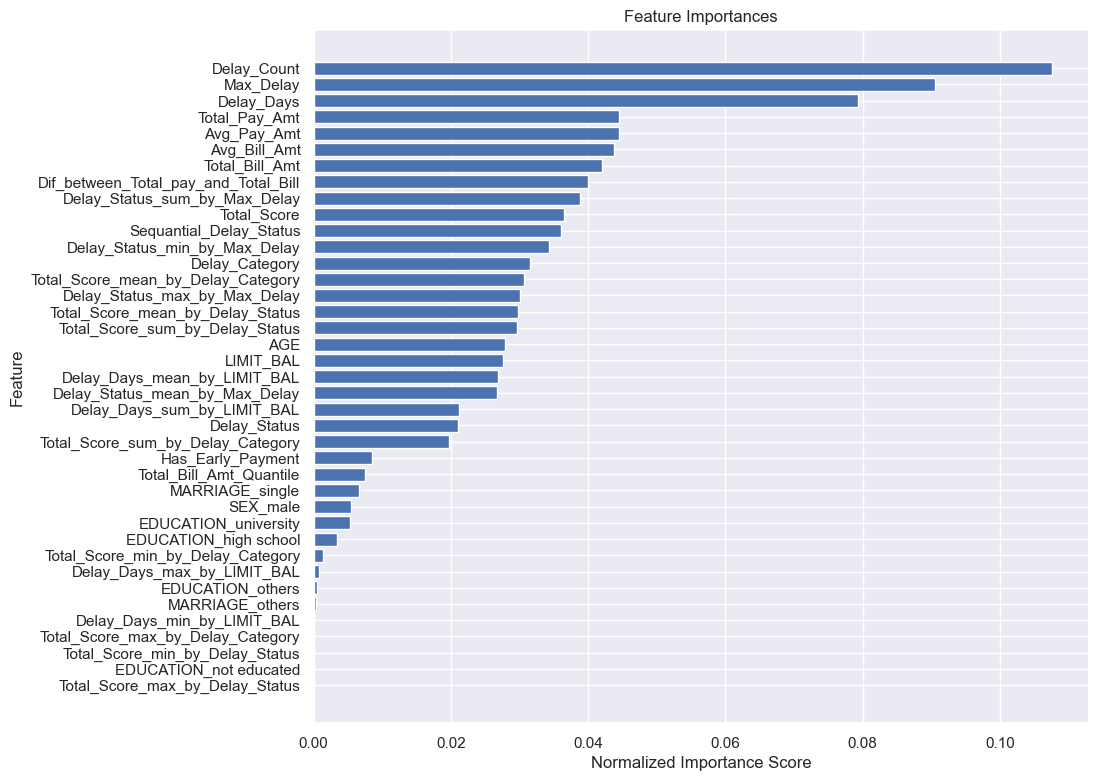

,Feature,Importance
3,Delay_Count,0.107537
4,Max_Delay,0.090541
6,Delay_Days,0.079335
12,Total_Pay_Amt,0.044545
11,Avg_Pay_Amt,0.044435
9,Avg_Bill_Amt,0.043722
10,Total_Bill_Amt,0.042087
13,Dif_between_Total_pay_and_Total_Bill,0.040029
29,Delay_Status_sum_by_Max_Delay,0.038843
15,Total_Score,0.036418


In [104]:
compute_and_plot_shap_and_importances(
            best_cb_model, model, X_train_tb, feature_names=X_train_tb.columns)

In [110]:
new_inputs = [['AGE','LIMIT_BAL','Delay_Count','Max_Delay', 'Delay_Days','Total_Pay_Amt','Avg_Pay_Amt','Avg_Bill_Amt','Total_Bill_Amt',
               'Dif_between_Total_pay_and_Total_Bill','Delay_Status_sum_by_Max_Delay','Total_Score','Sequantial_Delay_Status',
               'Delay_Status_min_by_Max_Delay','Delay_Category','Total_Score_mean_by_Delay_Category','Delay_Status_max_by_Max_Delay',
               'Total_Score_mean_by_Delay_Status','Total_Score_sum_by_Delay_Status','Delay_Days_mean_by_LIMIT_BAL',
               'Delay_Status_mean_by_Max_Delay','Delay_Days_sum_by_LIMIT_BAL','Delay_Status','Total_Score_sum_by_Delay_Category']]

new_inputs

[['AGE',
  'LIMIT_BAL',
  'Delay_Count',
  'Max_Delay',
  'Delay_Days',
  'Total_Pay_Amt',
  'Avg_Pay_Amt',
  'Avg_Bill_Amt',
  'Total_Bill_Amt',
  'Dif_between_Total_pay_and_Total_Bill',
  'Delay_Status_sum_by_Max_Delay',
  'Total_Score',
  'Sequantial_Delay_Status',
  'Delay_Status_min_by_Max_Delay',
  'Delay_Category',
  'Total_Score_mean_by_Delay_Category',
  'Delay_Status_max_by_Max_Delay',
  'Total_Score_mean_by_Delay_Status',
  'Total_Score_sum_by_Delay_Status',
  'Delay_Days_mean_by_LIMIT_BAL',
  'Delay_Status_mean_by_Max_Delay',
  'Delay_Days_sum_by_LIMIT_BAL',
  'Delay_Status',
  'Total_Score_sum_by_Delay_Category']]

In [ ]:
import pandas as pd
from sklearn.metrics import roc_auc_score, roc_curve, auc

variables = []
train_gini_scores = []
test_gini_scores = []


for i in X_train_tb[['AGE',
  'LIMIT_BAL',
  'Delay_Count',
  'Max_Delay',
  'Delay_Days',
  'Total_Pay_Amt',
  'Avg_Pay_Amt',
  'Avg_Bill_Amt',
  'Total_Bill_Amt',
  'Dif_between_Total_pay_and_Total_Bill',
  'Delay_Status_sum_by_Max_Delay',
  'Total_Score',
  'Sequantial_Delay_Status',
  'Delay_Status_min_by_Max_Delay',
  'Delay_Category',
  'Total_Score_mean_by_Delay_Category',
  'Delay_Status_max_by_Max_Delay',
  'Total_Score_mean_by_Delay_Status',
  'Total_Score_sum_by_Delay_Status',
  'Delay_Days_mean_by_LIMIT_BAL',
  'Delay_Status_mean_by_Max_Delay',
  'Delay_Days_sum_by_LIMIT_BAL',
  'Delay_Status',
  'Total_Score_sum_by_Delay_Category']]:
    X_train_single_var = X_train_tb[[i]]
    X_test_single_var = X_test_tb[[i]]

    best_cb_model.fit(X_train_single_var, y_train_tb)
    y_pred_train_single_var = best_cb_model.predict_proba(X_train_single_var)[:, 1]
    train_roc = roc_auc_score(y_train_tb, y_pred_train_single_var)
    train_gini = 2 * train_roc - 1

    y_pred_test_single_var = best_cb_model.predict_proba(X_test_single_var)[:, 1]
    test_roc = roc_auc_score(y_test_tb, y_pred_test_single_var)
    test_gini = 2 * test_roc - 1

    variables.append(i)
    train_gini_scores.append(train_gini)
    test_gini_scores.append(test_gini)

results_df = pd.DataFrame({
    'Variable': variables,
    'Train Gini': train_gini_scores,
    'Test Gini': test_gini_scores
})

results_df_sorted = results_df.sort_values(by='Test Gini', ascending=False)

pd.options.display.float_format = '{:.4f}'.format

results_df_sorted


0:	learn: 0.6882447	total: 51.8ms	remaining: 1m 2s
1:	learn: 0.6835302	total: 63.5ms	remaining: 38.5s
2:	learn: 0.6789669	total: 71.8ms	remaining: 29s
3:	learn: 0.6745222	total: 78.8ms	remaining: 23.9s
4:	learn: 0.6702155	total: 86.8ms	remaining: 21s
5:	learn: 0.6660378	total: 93.6ms	remaining: 18.8s
6:	learn: 0.6619859	total: 100ms	remaining: 17.3s
7:	learn: 0.6580290	total: 107ms	remaining: 16.2s
8:	learn: 0.6542009	total: 115ms	remaining: 15.4s
9:	learn: 0.6505036	total: 122ms	remaining: 14.7s
10:	learn: 0.6469104	total: 128ms	remaining: 14s
11:	learn: 0.6434365	total: 135ms	remaining: 13.5s
12:	learn: 0.6400183	total: 161ms	remaining: 14.9s
13:	learn: 0.6367485	total: 172ms	remaining: 14.7s
14:	learn: 0.6335787	total: 182ms	remaining: 14.6s
15:	learn: 0.6304825	total: 192ms	remaining: 14.4s
16:	learn: 0.6274940	total: 203ms	remaining: 14.3s
17:	learn: 0.6245950	total: 213ms	remaining: 14.2s
18:	learn: 0.6217890	total: 222ms	remaining: 14s
19:	learn: 0.6190688	total: 232ms	remaining

In [115]:
results_df_sorted

,Variable,Train Gini,Test Gini
2,Delay_Count,0.4558,0.4436
4,Delay_Days,0.4558,0.4436
3,Max_Delay,0.4528,0.4399
10,Delay_Status_sum_by_Max_Delay,0.4349,0.4245
23,Total_Score_sum_by_Delay_Category,0.4103,0.3993
14,Delay_Category,0.4103,0.3993
15,Total_Score_mean_by_Delay_Category,0.4103,0.3993
22,Delay_Status,0.4037,0.3960
20,Delay_Status_mean_by_Max_Delay,0.4037,0.3960
18,Total_Score_sum_by_Delay_Status,0.4037,0.3960


In [119]:
fin_input = data_for_tb[['Delay_Count','Delay_Days','Max_Delay','Delay_Status_sum_by_Max_Delay',
                  'Total_Score_sum_by_Delay_Category',
                  'Delay_Category','Total_Score_mean_by_Delay_Category','Delay_Status','Delay_Status_mean_by_Max_Delay',
                  'Total_Score_sum_by_Delay_Status','Total_Score_mean_by_Delay_Status','Delay_Status_max_by_Max_Delay',
                  'Delay_Status_min_by_Max_Delay','Total_Score','Sequantial_Delay_Status','Avg_Pay_Amt','Total_Pay_Amt',
                  'Delay_Days_mean_by_LIMIT_BAL','LIMIT_BAL',
                  'Delay_Days_sum_by_LIMIT_BAL']]
fin_output =data_for_tb['default']

In [123]:
X_train_uni, X_test_uni, y_train_uni, y_test_uni = train_test_split(fin_input, fin_output, test_size=0.3, random_state=42)

model_fin = best_cb_model.fit(X_train_uni,y_train_uni)

0:	learn: 0.6854992	total: 35.2ms	remaining: 42.7s
1:	learn: 0.6779513	total: 47.9ms	remaining: 29s
2:	learn: 0.6709066	total: 55.6ms	remaining: 22.4s
3:	learn: 0.6640605	total: 65.6ms	remaining: 19.8s
4:	learn: 0.6574154	total: 75.3ms	remaining: 18.2s
5:	learn: 0.6508721	total: 83.2ms	remaining: 16.8s
6:	learn: 0.6444818	total: 92ms	remaining: 15.9s
7:	learn: 0.6384466	total: 99.6ms	remaining: 15s
8:	learn: 0.6326075	total: 108ms	remaining: 14.5s
9:	learn: 0.6269548	total: 117ms	remaining: 14s
10:	learn: 0.6214495	total: 125ms	remaining: 13.7s
11:	learn: 0.6161247	total: 133ms	remaining: 13.4s
12:	learn: 0.6111107	total: 142ms	remaining: 13.1s
13:	learn: 0.6064061	total: 150ms	remaining: 12.9s
14:	learn: 0.6015938	total: 161ms	remaining: 12.8s
15:	learn: 0.5970597	total: 168ms	remaining: 12.6s
16:	learn: 0.5925233	total: 178ms	remaining: 12.5s
17:	learn: 0.5881554	total: 186ms	remaining: 12.3s
18:	learn: 0.5839272	total: 194ms	remaining: 12.2s
19:	learn: 0.5798481	total: 202ms	remaini

In [125]:
train_and_evaluate_model('CB  for selected features', model_fin, X_train_uni, y_train_uni, X_test_uni, y_test_uni)

0:	learn: 0.6854992	total: 17.9ms	remaining: 21.7s
1:	learn: 0.6779513	total: 36.4ms	remaining: 22s
2:	learn: 0.6709066	total: 54.4ms	remaining: 22s
3:	learn: 0.6640605	total: 71.5ms	remaining: 21.6s
4:	learn: 0.6574154	total: 85.4ms	remaining: 20.6s
5:	learn: 0.6508721	total: 102ms	remaining: 20.5s
6:	learn: 0.6444818	total: 119ms	remaining: 20.6s
7:	learn: 0.6384466	total: 133ms	remaining: 20.1s
8:	learn: 0.6326075	total: 163ms	remaining: 21.9s
9:	learn: 0.6269548	total: 179ms	remaining: 21.6s
10:	learn: 0.6214495	total: 194ms	remaining: 21.2s
11:	learn: 0.6161247	total: 211ms	remaining: 21.1s
12:	learn: 0.6111107	total: 227ms	remaining: 21s
13:	learn: 0.6064061	total: 264ms	remaining: 22.6s
14:	learn: 0.6015938	total: 280ms	remaining: 22.3s
15:	learn: 0.5970597	total: 294ms	remaining: 22s
16:	learn: 0.5925233	total: 310ms	remaining: 21.8s
17:	learn: 0.5881554	total: 325ms	remaining: 21.6s
18:	learn: 0.5839272	total: 340ms	remaining: 21.4s
19:	learn: 0.5798481	total: 354ms	remaining:

[0.55562436840884, 0.5146992404916513]